In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

print(tf.__version__)

2023-11-22 18:59:51.343891: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 18:59:51.409025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 18:59:51.409060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 18:59:51.410592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 18:59:51.423229: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 18:59:51.423735: I tensorflow/core/platform/cpu_feature_guard.cc:1

2.15.0


In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
input_shape = (32, 32, 3)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_train = X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_test = X_test / 255.0

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


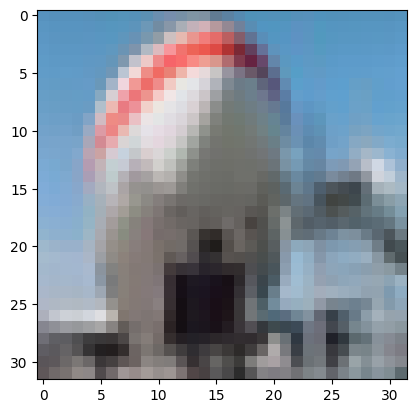

In [43]:
index = 189
print(y_train[index])
plt.imshow(X_train[index])
plt.show()

In [28]:
batch_size = 32
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [29]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 146s 91ms/step - loss: 1.8344 - acc: 0.3261
Epoch 2/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.5154 - acc: 0.4525
Epoch 3/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.3726 - acc: 0.5105
Epoch 4/10
1563/1563 [==============================] - 170s 109ms/step - loss: 1.2814 - acc: 0.5431
Epoch 5/10
1563/1563 [==============================] - 199s 127ms/step - loss: 1.2031 - acc: 0.5741
Epoch 6/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1398 - acc: 0.5979
Epoch 7/10
1563/1563 [==============================] - 177s 114ms/step - loss: 1.0903 - acc: 0.6169
Epoch 8/10
1563/1563 [==============================] - 176s 112ms/step - loss: 1.0455 - acc: 0.6358
Epoch 9/10
1563/1563 [==============================] - 160s 102ms/step - loss: 1.0041 - acc: 0.6477
Epoch 10/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9732 - acc

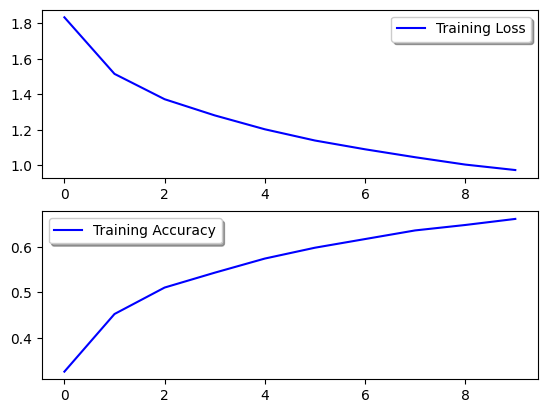

In [30]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 21ms/step - loss: 0.9249 - acc: 0.6772


In [32]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 7s 21ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

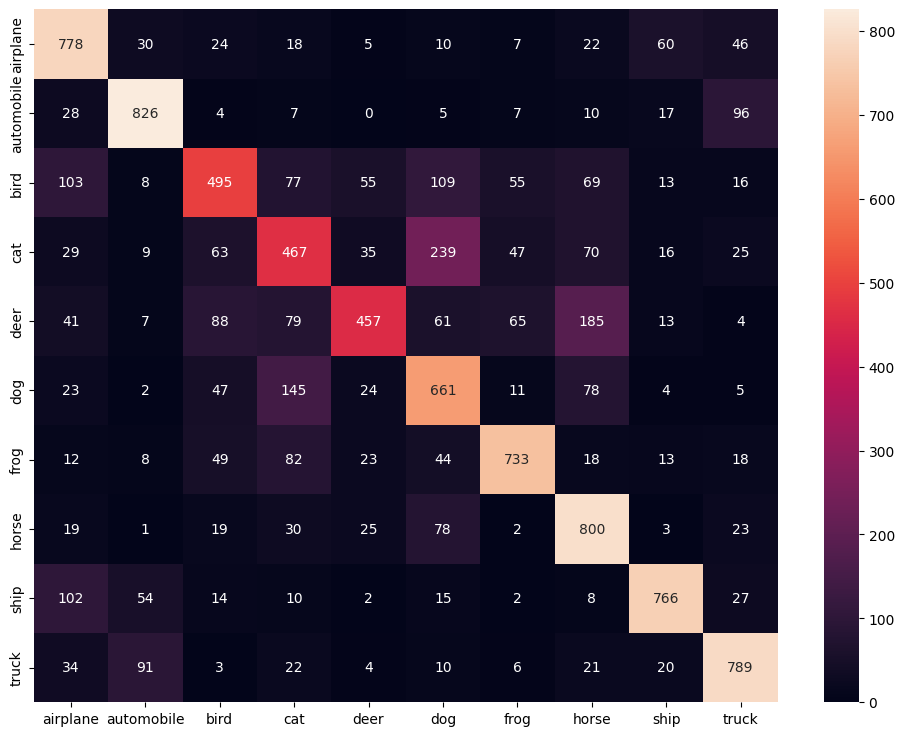

In [33]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

In [34]:
type(model)

keras.src.engine.sequential.Sequential

In [35]:
# lihat arsitektur model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [36]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 67.72%


In [37]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

/home/furqan/Documents/Kuliah/Semester 5/Kecerdasan Artifisial/projek/tugas 2/env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk
